In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [2]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\01 Diabetes Prediction")
df = pd.read_csv("Diabetes-dataset_FT.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


## Seperating dependent and independent variables

In [3]:
X = df.iloc[:,:-1].values
X

array([[ 0.86527574, -0.00512393,  0.92845833, ...,  0.21797752,
         0.79864498,  1.55695702],
       [-1.20598931, -0.54277224,  0.5460018 , ..., -0.87467912,
        -0.32839152, -0.16394935],
       [ 2.01597855, -0.72198835, -1.30253807, ..., -1.38978867,
         0.98240093, -0.07337533],
       ...,
       [-0.02240928, -0.00512393,  0.16354528, ..., -0.93711664,
        -0.76123887, -0.25452337],
       [ 0.14197684, -1.08042056, -1.30253807, ..., -0.3283508 ,
        -0.33655845,  1.28523497],
       [-0.94297153, -0.18434003,  0.67348731, ..., -0.28152266,
        -0.47539628, -0.88854151]])

In [4]:
Y = df.iloc[:,-1].values
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

## Test-train split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

## Model Selection

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[152  13]
 [ 38  59]]
Accuracy by confusion matrix: 0.8053435114503816


                  precision    recall  f1-score   support

without diabetes       0.80      0.92      0.86       165
   with diabetes       0.82      0.61      0.70        97

        accuracy                           0.81       262
       macro avg       0.81      0.76      0.78       262
    weighted avg       0.81      0.81      0.80       262

----------------------------------------------------------------------


### Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[147  18]
 [ 42  55]]
Accuracy by confusion matrix: 0.7709923664122137


                  precision    recall  f1-score   support

without diabetes       0.78      0.89      0.83       165
   with diabetes       0.75      0.57      0.65        97

        accuracy                           0.77       262
       macro avg       0.77      0.73      0.74       262
    weighted avg       0.77      0.77      0.76       262

----------------------------------------------------------------------


### K-nearest neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[139  26]
 [ 43  54]]
Accuracy by confusion matrix: 0.7366412213740458


                  precision    recall  f1-score   support

without diabetes       0.76      0.84      0.80       165
   with diabetes       0.68      0.56      0.61        97

        accuracy                           0.74       262
       macro avg       0.72      0.70      0.71       262
    weighted avg       0.73      0.74      0.73       262

----------------------------------------------------------------------


### Decision tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[129  36]
 [ 32  65]]
Accuracy by confusion matrix: 0.7404580152671756


                  precision    recall  f1-score   support

without diabetes       0.80      0.78      0.79       165
   with diabetes       0.64      0.67      0.66        97

        accuracy                           0.74       262
       macro avg       0.72      0.73      0.72       262
    weighted avg       0.74      0.74      0.74       262

----------------------------------------------------------------------


### Support Vector Classifier

In [11]:
from sklearn import svm
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[158   7]
 [ 46  51]]
Accuracy by confusion matrix: 0.7977099236641222


                  precision    recall  f1-score   support

without diabetes       0.77      0.96      0.86       165
   with diabetes       0.88      0.53      0.66        97

        accuracy                           0.80       262
       macro avg       0.83      0.74      0.76       262
    weighted avg       0.81      0.80      0.78       262

----------------------------------------------------------------------


## Hyperparameter Tuning

### Logistic Regression

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.770825 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.768643 (0.041093) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768643 (0.041093) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.767777 (0.041135) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.770398 (0.041642) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.770398 (0.041642) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770825 (0.041311) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.758675 (0.043801) wit

In [26]:
lr = LogisticRegression(random_state=16,C=0.1,penalty='l2',
    dual=False,
    tol=0.0001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    solver='liblinear',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[445  55]
 [117 151]]
Accuracy by confusion matrix: 0.7760416666666666


                  precision    recall  f1-score   support

without diabetes       0.79      0.89      0.84       500
   with diabetes       0.73      0.56      0.64       268

        accuracy                           0.78       768
       macro avg       0.76      0.73      0.74       768
    weighted avg       0.77      0.78      0.77       768

----------------------------------------------------------------------


In [14]:
import pickle
pickle.dump(lr, open('lr.pkl','wb'))

## Evaluating Results

In [15]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\01 Diabetes Prediction")
df_copy= pd.read_csv("diabetes-preprocessed.csv")

In [16]:
df_copy

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


In [17]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])

In [18]:
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Y_pred
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0,0.0


In [19]:
df_results.to_csv('Diabetes-dataset_RS.csv', encoding='utf-8', index=False)





## Visualizing Results

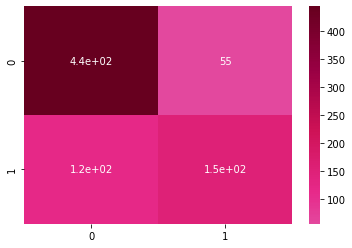

In [20]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

<AxesSubplot:title={'center':'Predicted'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

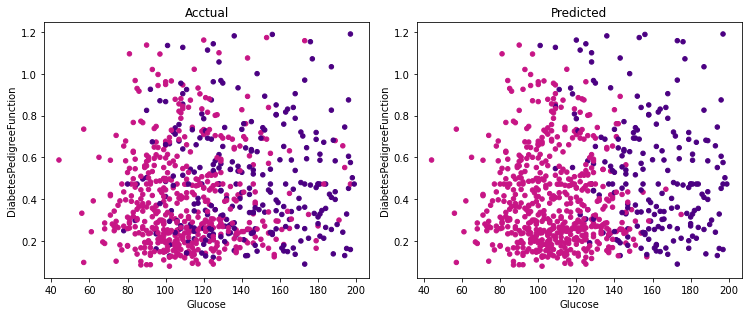

In [21]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Acctual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))